In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
import warnings
warnings.filterwarnings('ignore')
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# --------------------------------------
#  Configs
#
df = pd.read_csv("C:/Users/bberg/Desktop/Programs/PFL_MMA/PFL_Rolling_DB.csv",delimiter=',',index_col='Date',parse_dates=True)
min_fights_required = 101
start_date = datetime(1993,11,12)
fight_date = datetime(2021,12,21)
master_values = []


df = df.replace(np.nan,df.median())

In [3]:
test = df.loc[df.index >= '2021-01-01']
df = df.loc[df.index < '2021-01-01']

In [4]:

# ------------------------------------
#  Filter Function
#
def filter_df(name,fdate):
        temp = df[df['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df.drop(['Fighter','Height','Win'],axis=1)
#predictors = df[['Red Corner','']]
n_cols = predictors.shape[1]
target = to_categorical(df.Win)
df1 = df[df.index <= fight_date]

In [5]:


bigX = []
for i,f in enumerate(df1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(df1[feat][i] - df1[feat][opp])
                else:
                    x.append(df1[feat][i] - df1[feat][i-1])


        bigX.append(x)

X = np.asarray(bigX)







In [6]:
X = np.asarray(bigX)
y = df['Win']
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
def train_test_valid_split(X,y,train_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size=train_size,random_state = 1)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test,stratify=y_test,test_size=0.5,random_state = 1)
    return X_train,X_test,X_valid,y_train,y_test,y_valid

X_train,X_test,X_valid,y_train,y_test,y_valid = train_test_valid_split(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)




#print(accuracy_score(y_test, y_predict))

print("Accuracy is ", accuracy_score(y_test,y_predict)*100)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

y_predict = model.predict(X_valid)
print("Accuracy is ", accuracy_score(y_valid,y_predict)*100)
print(classification_report(y_valid, y_predict))
print(confusion_matrix(y_valid, y_predict))




Accuracy is  77.77777777777779
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.74      0.87      0.80        23

    accuracy                           0.78        45
   macro avg       0.79      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45

[[15  7]
 [ 3 20]]
Accuracy is  78.26086956521739
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.74      0.87      0.80        23

    accuracy                           0.78        46
   macro avg       0.79      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46

[[16  7]
 [ 3 20]]


In [7]:
#Validation Set

In [8]:
# Part 3 Validation Set for 2021
# ------------------------------------
#  Filter Function
#
def filter_test(name,fdate):
        temp = test[test['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df.drop(['Fighter','Height','Win'],axis=1)

n_cols = predictors.shape[1]
target = to_categorical(test.Win)





test1 = test[test.index <= fight_date]
bigX = []
for i,f in enumerate(test1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(test1[feat][i] - test1[feat][opp])
                else:
                    x.append(test1[feat][i] - test1[feat][i-1])


        bigX.append(x)

X_valid = np.asarray(bigX)
X_valid = scaler.transform(X_valid)

#X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)




predicted_y = model.predict_proba(X_valid)

predicted_y = predicted_y > .5

print("Accuracy is ", accuracy_score(predicted_y,target)*100)

Accuracy is  57.6530612244898


In [9]:
predicted_y = [1 if predicted_y[x][1] == True else 0 for x,y in enumerate(predicted_y)]

In [10]:
test['Profit'] = 0
for x,y in enumerate(test['Win']):
    if int(y) == 1:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = int(test['Odds'][x])
        else:
            test['Profit'][x] = 100
    elif int(y) == 0:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = -100
        else:
            test['Profit'][x] = int(test['Odds'][x])
            
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,-590,0,0,-590
2021-04-23,Clay Collard,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,400,0,1,400
2021-04-23,Natan Schulte,144,228,133,238,67,97,37,63,401,...,401.0,84.428571,-0.027778,0.070547,0.072755,0.10342,-500,10,0,-500
2021-04-23,Marcin Held,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,350,0,1,350
2021-04-23,Movlid Khaybulaev,1,1,9,19,1,1,8,8,38,...,38.0,0.000000,0.000000,0.209394,0.526316,0.00000,-400,2,1,100


In [11]:
test['Prediction'] = predicted_y          
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,-590,0,0,-590,1
2021-04-23,Clay Collard,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,400,0,1,400,0
2021-04-23,Natan Schulte,144,228,133,238,67,97,37,63,401,...,84.428571,-0.027778,0.070547,0.072755,0.10342,-500,10,0,-500,1
2021-04-23,Marcin Held,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,350,0,1,350,0
2021-04-23,Movlid Khaybulaev,1,1,9,19,1,1,8,8,38,...,0.000000,0.000000,0.209394,0.526316,0.00000,-400,2,1,100,1


In [12]:
test['Predicted_Profit'] = test['Prediction'] * test['Profit']

-3623


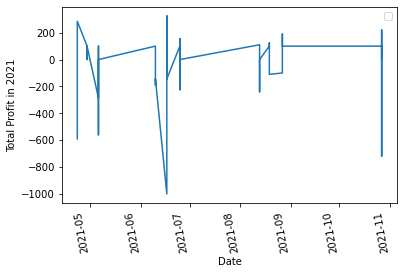

In [13]:
print(test['Predicted_Profit'].sum())
test['Predicted_Profit'].plot()
plt.xlabel('Date')
plt.ylabel("Total Profit in 2021")
plt.xticks(rotation=100)
plt.legend('')
plt.draw()

Best Threshold=0.518873, G-Mean=0.820


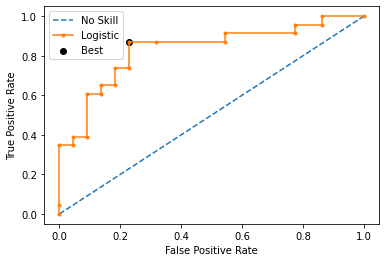

In [14]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()